<a href="https://colab.research.google.com/github/YeojinKim03/AI-study/blob/master/execute_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp /content/drive/MyDrive/AI/tmp/yolov3_custom_last.weights ./

##프로젝트 다운로드

In [2]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 25.76 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [15]:
%cd darkeras-yolov4 #폴더 위치 변경

[Errno 2] No such file or directory: 'darkeras-yolov4 #폴더 위치 변경'
/content/darkeras-yolov4


In [14]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("../yolov3_custom_last.weights", class_num=1) #자기 위의 폴더의 이 파일있음 ../
#class_num : 사용한 카테고리가 몇개냐, 1개

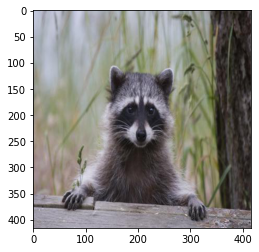

In [16]:
import matplotlib.pyplot as plt

image=plt.imread("r1.jpg")
plt.imshow(image)
plt.show()

#탐지 실행

In [17]:
bboxes=model.predict(image)

In [20]:
print(len(bboxes)) #탐지가 완료되면 1
print(bboxes) #순서대로 x,y,x,y, 신뢰도, 카테고리

1
[array([ 60.22370148,  62.97885895, 320.78244019, 415.        ,
         0.471093  ,   0.        ])]


##네모로 박스치기

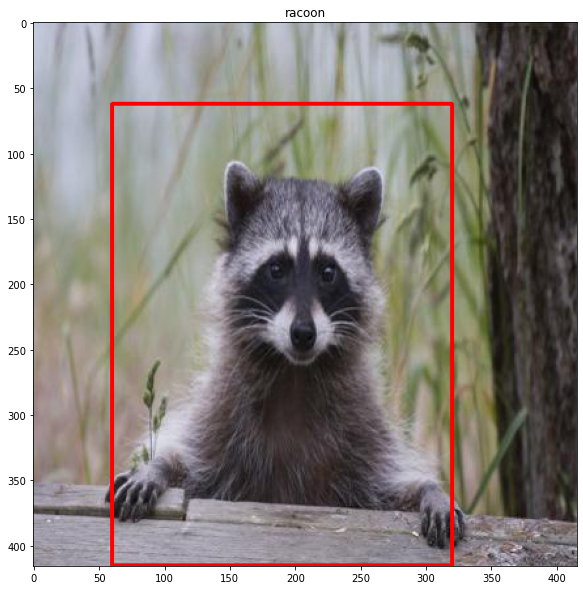

In [22]:
import cv2
import numpy as np
dummy = np.copy(image)

for box in bboxes:
    
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf = box[4]
    cls_id = int(box[5])
        
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)
     
plt.figure(figsize=(12,10))
plt.gca().set_title("racoon"), plt.imshow(dummy)
plt.show()